<a href="https://colab.research.google.com/github/TanisqSinghal/Data_science_internship/blob/main/Lecture_of_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv("Placement_Data.csv",index_col='sl_no')

In [ ]:
df.isnull().sum(axis=1)>0

sl_no
1      False
2      False
3      False
4       True
5      False
       ...  
211    False
212    False
213    False
214    False
215     True
Length: 215, dtype: bool

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
df

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
sl_no                                                                         
1          M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
2          M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
3          M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4          M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
5          M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
...      ...    ...      ...    ...      ...       ...       ...        ...   
211        M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
212        M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
213        M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
214        F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
215        M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

      workex  etest_p specialisation  mba_p      status    salary  
sl_no                                                              
1         No     55.0         Mkt&HR  58.80      Placed  270000.0  
2        Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
3         No     75.0        Mkt&Fin  57.80      Placed  250000.0  
4         No     66.0         Mkt&HR  59.43  Not Placed       0.0  
5         No     96.8        Mkt&Fin  55.50      Placed  425000.0  
...      ...      ...            ...    ...         ...       ...  
211       No     91.0        Mkt&Fin  74.49      Placed  400000.0  
212       No     74.0        Mkt&Fin  53.62      Placed  275000.0  
213      Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
214       No     70.0         Mkt&HR  60.23      Placed  204000.0  
215       No     89.0         Mkt&HR  60.22  Not Placed       0.0  

[215 rows x 14 columns]

In [ ]:
### Data Visalization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
sns.set(color_codes=True)

In [ ]:
## Draw scatter plot between 10th and 12th precentage


Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

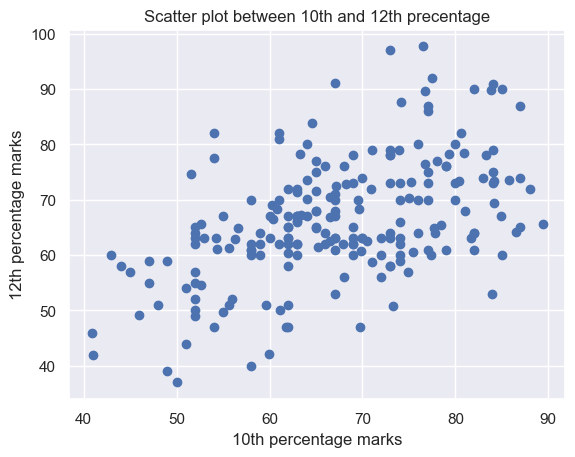

In [ ]:
plt.scatter(df['ssc_p'],df['hsc_p'])
plt.xlabel('10th percentage marks')
plt.ylabel('12th percentage marks')
plt.title("Scatter plot between 10th and 12th precentage")


In [ ]:
colors={'Placed': 'tab:green', 'Not Placed': 'tab:red'}

In [ ]:
df['status'].map(colors)

sl_no
1      tab:green
2      tab:green
3      tab:green
4        tab:red
5      tab:green
         ...    
211    tab:green
212    tab:green
213    tab:green
214    tab:green
215      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

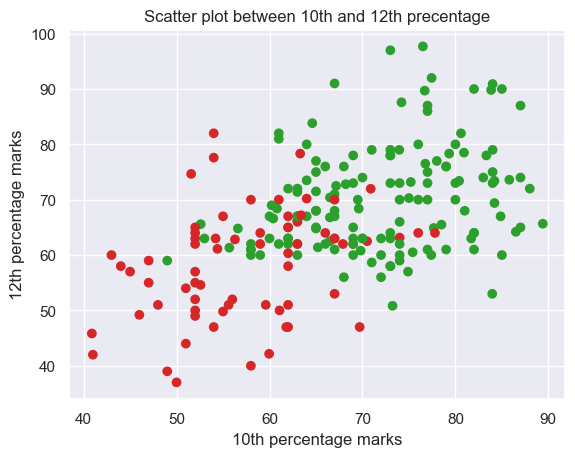

In [ ]:
plt.scatter(df['ssc_p'],df['hsc_p'], c=df['status'].map(colors))
plt.xlabel('10th percentage marks')
plt.ylabel('12th percentage marks')
plt.title("Scatter plot between 10th and 12th precentage")

## Pair plot of continue data type


In [ ]:
df

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
sl_no                                                                         
1          M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
2          M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
3          M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4          M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
5          M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
...      ...    ...      ...    ...      ...       ...       ...        ...   
211        M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
212        M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
213        M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
214        F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
215        M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

      workex  etest_p specialisation  mba_p      status    salary  
sl_no                                                              
1         No     55.0         Mkt&HR  58.80      Placed  270000.0  
2        Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
3         No     75.0        Mkt&Fin  57.80      Placed  250000.0  
4         No     66.0         Mkt&HR  59.43  Not Placed       0.0  
5         No     96.8        Mkt&Fin  55.50      Placed  425000.0  
...      ...      ...            ...    ...         ...       ...  
211       No     91.0        Mkt&Fin  74.49      Placed  400000.0  
212       No     74.0        Mkt&Fin  53.62      Placed  275000.0  
213      Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
214       No     70.0         Mkt&HR  60.23      Placed  204000.0  
215       No     89.0         Mkt&HR  60.22  Not Placed       0.0  

[215 rows x 14 columns]

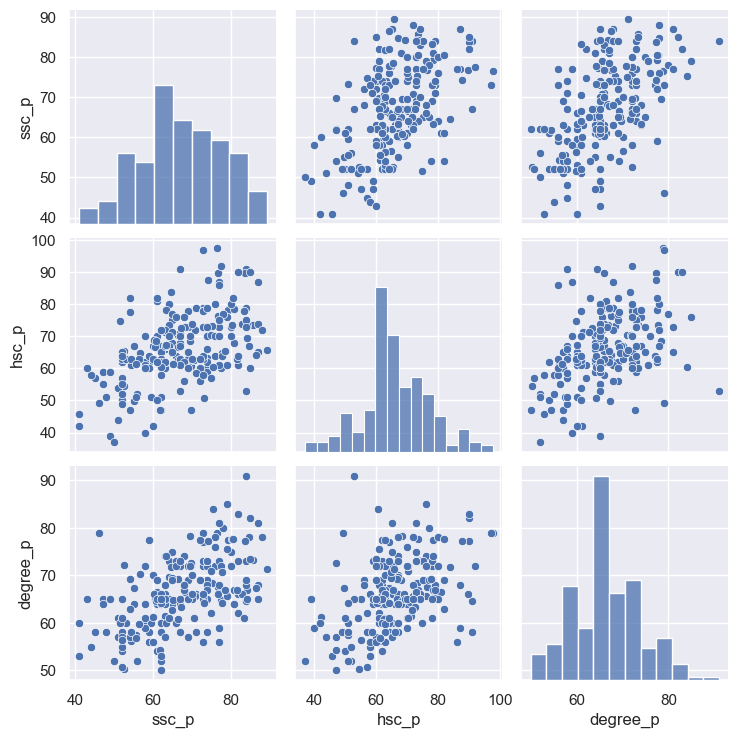

In [ ]:
sns.pairplot(df[['ssc_p','hsc_p','degree_p']])

In [ ]:
df

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
sl_no                                                                         
1          M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
2          M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
3          M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
4          M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
5          M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
...      ...    ...      ...    ...      ...       ...       ...        ...   
211        M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
212        M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
213        M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
214        F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
215        M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

      workex  etest_p specialisation  mba_p      status    salary  
sl_no                                                              
1         No     55.0         Mkt&HR  58.80      Placed  270000.0  
2        Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
3         No     75.0        Mkt&Fin  57.80      Placed  250000.0  
4         No     66.0         Mkt&HR  59.43  Not Placed       0.0  
5         No     96.8        Mkt&Fin  55.50      Placed  425000.0  
...      ...      ...            ...    ...         ...       ...  
211       No     91.0        Mkt&Fin  74.49      Placed  400000.0  
212       No     74.0        Mkt&Fin  53.62      Placed  275000.0  
213      Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
214       No     70.0         Mkt&HR  60.23      Placed  204000.0  
215       No     89.0         Mkt&HR  60.22  Not Placed       0.0  

[215 rows x 14 columns]

## Draw a boxblot for 10th & 12th percentage of students

<Axes: ylabel='ssc_p'>

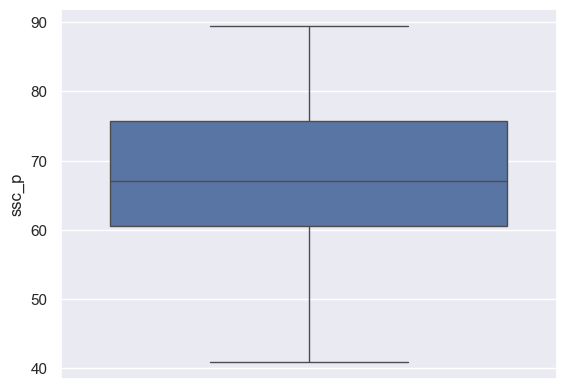

In [ ]:
sns.boxplot(y='ssc_p',data=df)

<Axes: ylabel='hsc_p'>

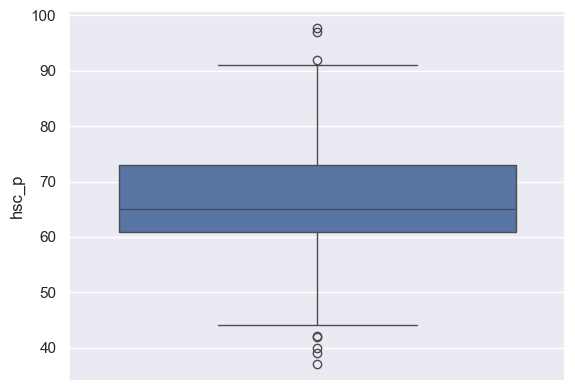

In [ ]:
sns.boxplot(y='hsc_p',data=df)

<Axes: xlabel='status', ylabel='hsc_p'>

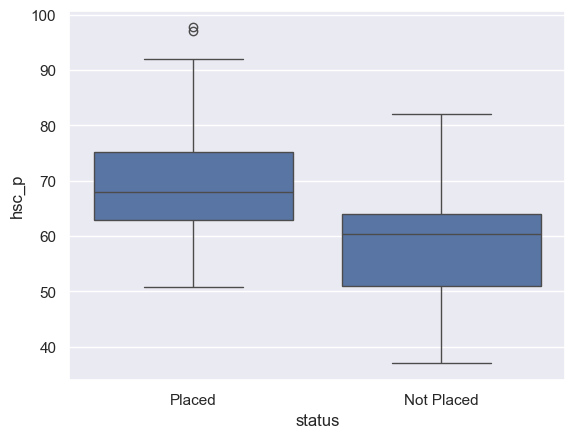

In [ ]:
sns.boxplot(y='hsc_p',data=df,x='status')

# line plots

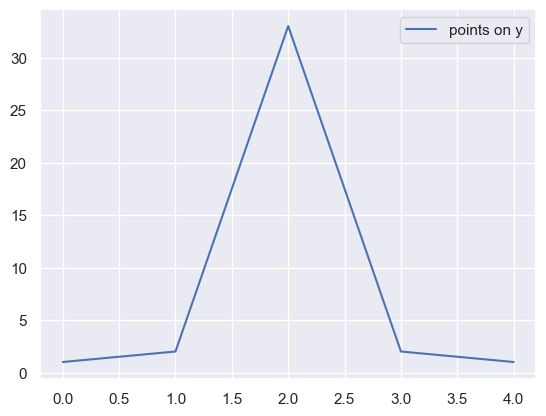

In [ ]:
y=[1,2,33,2,1]
plt.plot(y, label='points on y')
plt.legend()

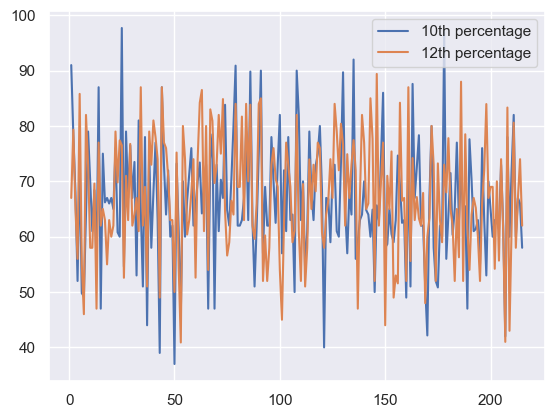

In [ ]:
plt.plot(df['hsc_p'],label='10th percentage')
plt.plot(df['ssc_p'],label='12th percentage')
plt.legend()

In [ ]:
df.corr(numeric_only=True)

ssc_p     hsc_p  degree_p   etest_p     mba_p    salary
ssc_p     1.000000  0.511472  0.538404  0.261993  0.388478  0.538090
hsc_p     0.511472  1.000000  0.434206  0.245113  0.354823  0.452569
degree_p  0.538404  0.434206  1.000000  0.224470  0.402364  0.408371
etest_p   0.261993  0.245113  0.224470  1.000000  0.218055  0.186988
mba_p     0.388478  0.354823  0.402364  0.218055  1.000000  0.139823
salary    0.538090  0.452569  0.408371  0.186988  0.139823  1.000000

<Axes: >

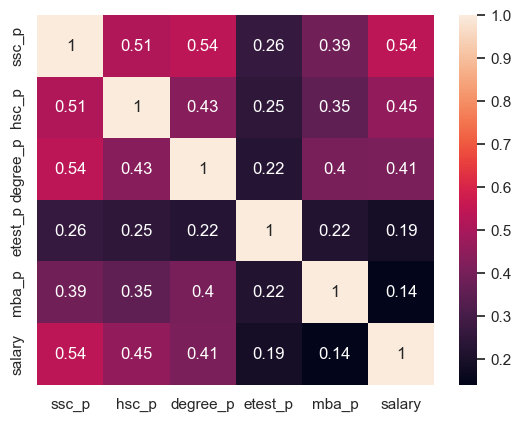

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

(array([67.,  0., 94., 38., 10.,  3.,  1.,  1.,  0.,  1.]),
 array([     0.,  94000., 188000., 282000., 376000., 470000., 564000.,
        658000., 752000., 846000., 940000.]),
 <BarContainer object of 10 artists>)

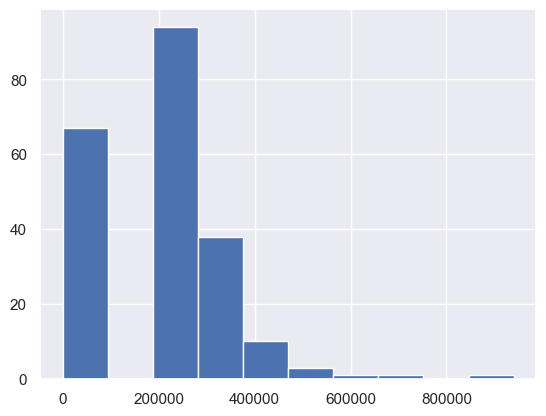

In [ ]:
plt.hist(df['salary'])

<Axes: xlabel='salary', ylabel='Density'>

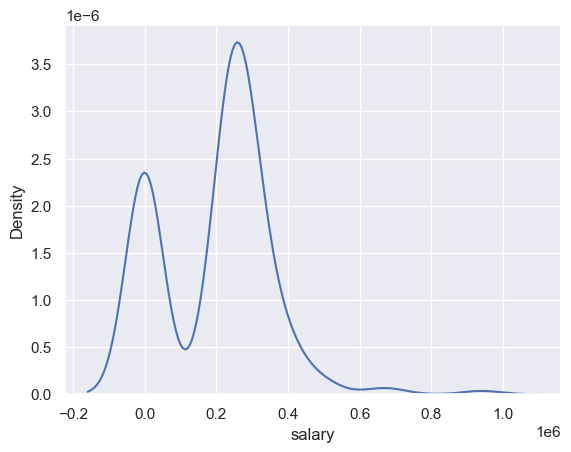

In [ ]:
sns.kdeplot(df['salary'])

## Outlier Analysis

<Axes: ylabel='degree_p'>

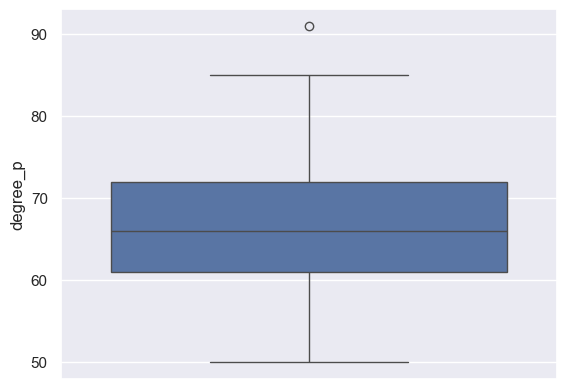

In [ ]:
sns.boxplot(y="degree_p",data=df)

In [ ]:
percentile25=df['degree_p'].quantile(0.25)

In [ ]:
percentile75=df['degree_p'].quantile(0.75)
iqr=percentile75-percentile25
iqr

11.0

In [ ]:
uper_limit=percentile75+(1.5*iqr)
lower_limit=percentile25-(1.5*iqr)

In [ ]:
df=df[df['degree_p']<uper_limit]
df=df[df['degree_p']>lower_limit]


In [ ]:
col=['ssc_p','hsc_p','degree_p','etest_p','mba_p','salary']

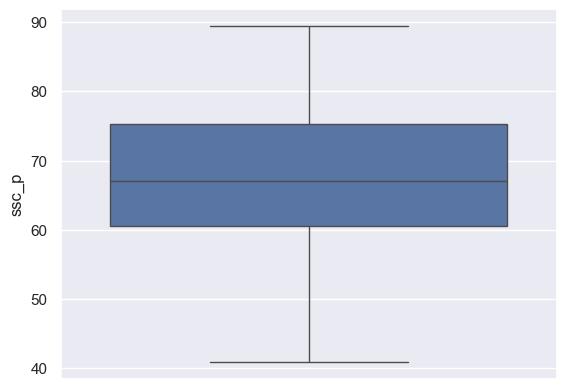

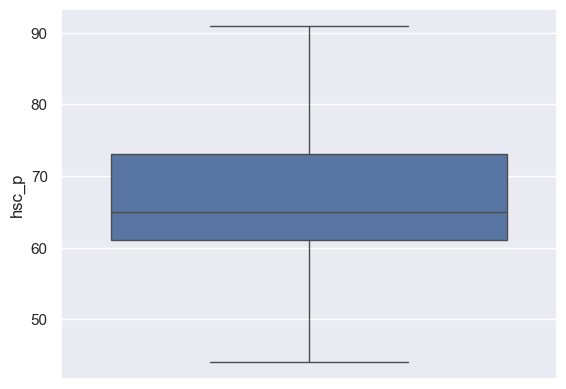

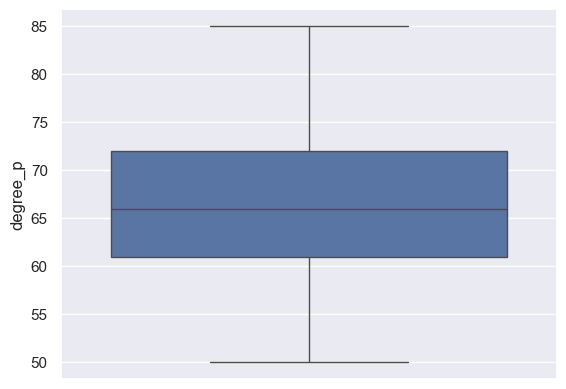

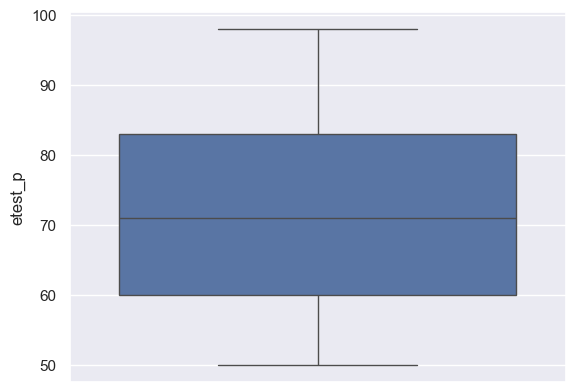

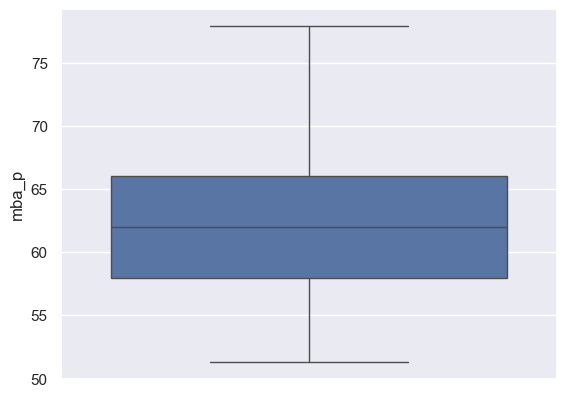

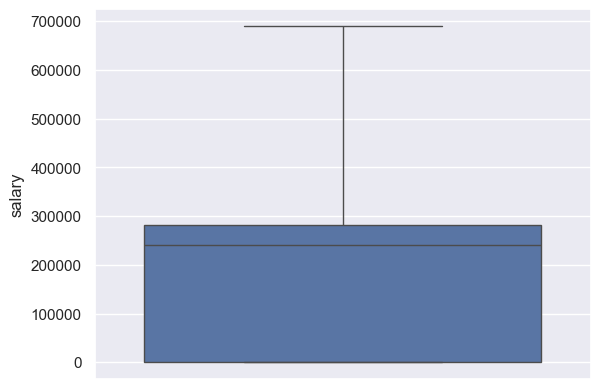

In [ ]:
for c in col:
    percentile25=df[c].quantile(0.25)
    percentile75=df[c].quantile(0.75)
    iqr=percentile75-percentile25
    uper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    df=df[df[c]<uper_limit]
    df=df[df[c]>lower_limit]
    plt.figure()
    sns.boxplot(y=c,data=df)


In [ ]:
for i in col:
    percentile25=df[i].quantile(0.25)
    percentile75=df[i].quantile(0.75)
    iqr=percentile75-percentile25
    uper_limit=percentile75+(1.5*iqr)
    lower_limit=percentile25-(1.5*iqr)
    print("Uper Limit of " , i, 'Coloumn : ' ,uper_limit)
    print("Lower Limit of ", i, 'Coloumn : ' ,lower_limit)


Uper Limit of  ssc_p Coloumn :  97.37500000000003
Lower Limit of  ssc_p Coloumn :  39.17499999999998
Uper Limit of  hsc_p Coloumn :  91.0
Lower Limit of  hsc_p Coloumn :  43.0
Uper Limit of  degree_p Coloumn :  88.5
Lower Limit of  degree_p Coloumn :  44.5
Uper Limit of  etest_p Coloumn :  117.5
Lower Limit of  etest_p Coloumn :  25.5
Uper Limit of  mba_p Coloumn :  78.305
Lower Limit of  mba_p Coloumn :  45.76499999999999
Uper Limit of  salary Coloumn :  703125.0
Lower Limit of  salary Coloumn :  -421875.0


In [ ]:
df.reset_index(drop='first',inplace=True)

In [ ]:
df

gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
1        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
2        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
3        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
4        M  55.00   Others  49.80   Others   Science     67.25   Sci&Tech   
..     ...    ...      ...    ...      ...       ...       ...        ...   
199      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
200      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
201      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
202      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
203      M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p      status    salary  
0      Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
1       No     75.0        Mkt&Fin  57.80      Placed  250000.0  
2       No     66.0         Mkt&HR  59.43  Not Placed       0.0  
3       No     96.8        Mkt&Fin  55.50      Placed  425000.0  
4      Yes     55.0        Mkt&Fin  51.58  Not Placed       0.0  
..     ...      ...            ...    ...         ...       ...  
199     No     91.0        Mkt&Fin  74.49      Placed  400000.0  
200     No     74.0        Mkt&Fin  53.62      Placed  275000.0  
201    Yes     59.0        Mkt&Fin  69.72      Placed  295000.0  
202     No     70.0         Mkt&HR  60.23      Placed  204000.0  
203     No     89.0         Mkt&HR  60.22  Not Placed       0.0  

[204 rows x 14 columns]

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
df['ssc_b']=le.fit_transform(df['ssc_b'])

In [ ]:
df['ssc_b']

0      0
1      0
2      0
3      0
4      1
      ..
199    1
200    1
201    1
202    1
203    0
Name: ssc_b, Length: 204, dtype: int32

In [ ]:
col=['gender','hsc_b','hsc_s','degree_t','workex','specialisation','status']

In [ ]:
for c in col:
    df[c]=le.fit_transform(df[c])

In [ ]:
df

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  79.33      0  78.33      1      2     77.48         2       1   
1         1  65.00      0  68.00      0      0     64.00         0       0   
2         1  56.00      0  52.00      0      2     52.00         2       0   
3         1  85.80      0  73.60      0      1     73.30         0       0   
4         1  55.00      1  49.80      1      2     67.25         2       1   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
199       1  80.60      1  82.00      1      1     77.60         0       0   
200       1  58.00      1  60.00      1      2     72.00         2       0   
201       1  67.00      1  67.00      1      1     73.00         0       1   
202       0  74.00      1  66.00      1      1     58.00         0       0   
203       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  
0       86.5               0  66.28       1  200000.0  
1       75.0               0  57.80       1  250000.0  
2       66.0               1  59.43       0       0.0  
3       96.8               0  55.50       1  425000.0  
4       55.0               0  51.58       0       0.0  
..       ...             ...    ...     ...       ...  
199     91.0               0  74.49       1  400000.0  
200     74.0               0  53.62       1  275000.0  
201     59.0               0  69.72       1  295000.0  
202     70.0               1  60.23       1  204000.0  
203     89.0               1  60.22       0       0.0  

[204 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          204 non-null    int32  
 1   ssc_p           204 non-null    float64
 2   ssc_b           204 non-null    int32  
 3   hsc_p           204 non-null    float64
 4   hsc_b           204 non-null    int32  
 5   hsc_s           204 non-null    int32  
 6   degree_p        204 non-null    float64
 7   degree_t        204 non-null    int32  
 8   workex          204 non-null    int32  
 9   etest_p         204 non-null    float64
 10  specialisation  204 non-null    int32  
 11  mba_p           204 non-null    float64
 12  status          204 non-null    int32  
 13  salary          204 non-null    float64
dtypes: float64(6), int32(8)
memory usage: 16.1 KB


In [ ]:
df

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  79.33      0  78.33      1      2     77.48         2       1   
1         1  65.00      0  68.00      0      0     64.00         0       0   
2         1  56.00      0  52.00      0      2     52.00         2       0   
3         1  85.80      0  73.60      0      1     73.30         0       0   
4         1  55.00      1  49.80      1      2     67.25         2       1   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
199       1  80.60      1  82.00      1      1     77.60         0       0   
200       1  58.00      1  60.00      1      2     72.00         2       0   
201       1  67.00      1  67.00      1      1     73.00         0       1   
202       0  74.00      1  66.00      1      1     58.00         0       0   
203       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  status    salary  
0       86.5               0  66.28       1  200000.0  
1       75.0               0  57.80       1  250000.0  
2       66.0               1  59.43       0       0.0  
3       96.8               0  55.50       1  425000.0  
4       55.0               0  51.58       0       0.0  
..       ...             ...    ...     ...       ...  
199     91.0               0  74.49       1  400000.0  
200     74.0               0  53.62       1  275000.0  
201     59.0               0  69.72       1  295000.0  
202     70.0               1  60.23       1  204000.0  
203     89.0               1  60.22       0       0.0  

[204 rows x 14 columns]

In [ ]:
new_df = df.iloc[0:,:-2]

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans=KMeans(4)

In [ ]:
kmeans.fit(new_df)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
cluster_value=kmeans.predict(new_df)

In [ ]:
cluster_value.shape

(204,)

In [ ]:
new_df

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  79.33      0  78.33      1      2     77.48         2       1   
1         1  65.00      0  68.00      0      0     64.00         0       0   
2         1  56.00      0  52.00      0      2     52.00         2       0   
3         1  85.80      0  73.60      0      1     73.30         0       0   
4         1  55.00      1  49.80      1      2     67.25         2       1   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
199       1  80.60      1  82.00      1      1     77.60         0       0   
200       1  58.00      1  60.00      1      2     72.00         2       0   
201       1  67.00      1  67.00      1      1     73.00         0       1   
202       0  74.00      1  66.00      1      1     58.00         0       0   
203       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  
0       86.5               0  66.28  
1       75.0               0  57.80  
2       66.0               1  59.43  
3       96.8               0  55.50  
4       55.0               0  51.58  
..       ...             ...    ...  
199     91.0               0  74.49  
200     74.0               0  53.62  
201     59.0               0  69.72  
202     70.0               1  60.23  
203     89.0               1  60.22  

[204 rows x 12 columns]

In [ ]:
new_df['clusters']=cluster_value

In [ ]:
new_df

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  79.33      0  78.33      1      2     77.48         2       1   
1         1  65.00      0  68.00      0      0     64.00         0       0   
2         1  56.00      0  52.00      0      2     52.00         2       0   
3         1  85.80      0  73.60      0      1     73.30         0       0   
4         1  55.00      1  49.80      1      2     67.25         2       1   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
199       1  80.60      1  82.00      1      1     77.60         0       0   
200       1  58.00      1  60.00      1      2     72.00         2       0   
201       1  67.00      1  67.00      1      1     73.00         0       1   
202       0  74.00      1  66.00      1      1     58.00         0       0   
203       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  clusters  
0       86.5               0  66.28         2  
1       75.0               0  57.80         1  
2       66.0               1  59.43         3  
3       96.8               0  55.50         2  
4       55.0               0  51.58         3  
..       ...             ...    ...       ...  
199     91.0               0  74.49         2  
200     74.0               0  53.62         1  
201     59.0               0  69.72         0  
202     70.0               1  60.23         0  
203     89.0               1  60.22         1  

[204 rows x 13 columns]

In [ ]:
kmeans.inertia_

40532.97087016197

In [ ]:
# X=new_df.values

In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# sc=StandardScaler()

In [ ]:
# now_df=sc.fit_transform(X)

In [ ]:
now_df = new_df

In [ ]:
now_df = pd.DataFrame(now_df)

In [ ]:
now_df

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  79.33      0  78.33      1      2     77.48         2       1   
1         1  65.00      0  68.00      0      0     64.00         0       0   
2         1  56.00      0  52.00      0      2     52.00         2       0   
3         1  85.80      0  73.60      0      1     73.30         0       0   
4         1  55.00      1  49.80      1      2     67.25         2       1   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
199       1  80.60      1  82.00      1      1     77.60         0       0   
200       1  58.00      1  60.00      1      2     72.00         2       0   
201       1  67.00      1  67.00      1      1     73.00         0       1   
202       0  74.00      1  66.00      1      1     58.00         0       0   
203       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  clusters  
0       86.5               0  66.28         2  
1       75.0               0  57.80         1  
2       66.0               1  59.43         3  
3       96.8               0  55.50         2  
4       55.0               0  51.58         3  
..       ...             ...    ...       ...  
199     91.0               0  74.49         2  
200     74.0               0  53.62         1  
201     59.0               0  69.72         0  
202     70.0               1  60.23         0  
203     89.0               1  60.22         1  

[204 rows x 13 columns]

In [ ]:
now_df.rename(columns={0 : 'gender', 1 : 'ssc_p',2 : 'ssc_b',3 : 'hsc_p',4 :'hsc_b',5 : 'hsc_s',
                       6 : 'degree_p', 7 : 'degree_t' , 8 : 'workex', 9 : 'etest_p', 10 :'specialisation',
                       11 : 'mba_p',12 :'clusters'},inplace=True)

In [ ]:
now_df

gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
0         1  79.33      0  78.33      1      2     77.48         2       1   
1         1  65.00      0  68.00      0      0     64.00         0       0   
2         1  56.00      0  52.00      0      2     52.00         2       0   
3         1  85.80      0  73.60      0      1     73.30         0       0   
4         1  55.00      1  49.80      1      2     67.25         2       1   
..      ...    ...    ...    ...    ...    ...       ...       ...     ...   
199       1  80.60      1  82.00      1      1     77.60         0       0   
200       1  58.00      1  60.00      1      2     72.00         2       0   
201       1  67.00      1  67.00      1      1     73.00         0       1   
202       0  74.00      1  66.00      1      1     58.00         0       0   
203       1  62.00      0  58.00      1      2     53.00         0       0   

     etest_p  specialisation  mba_p  clusters  
0       86.5               0  66.28         2  
1       75.0               0  57.80         1  
2       66.0               1  59.43         3  
3       96.8               0  55.50         2  
4       55.0               0  51.58         3  
..       ...             ...    ...       ...  
199     91.0               0  74.49         2  
200     74.0               0  53.62         1  
201     59.0               0  69.72         0  
202     70.0               1  60.23         0  
203     89.0               1  60.22         1  

[204 rows x 13 columns]

## Elbow Method

In [ ]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(new_df)
    Sum_of_squared_distances.append(kmeans.inertia_)

print(Sum_of_squared_distances)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

[93987.60609215686, 61627.410650040314, 47974.328233300825, 40528.80217308117, 38452.56725759161, 35127.61551567726, 32308.065202584214, 30733.123559136828, 29009.66807048716]


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


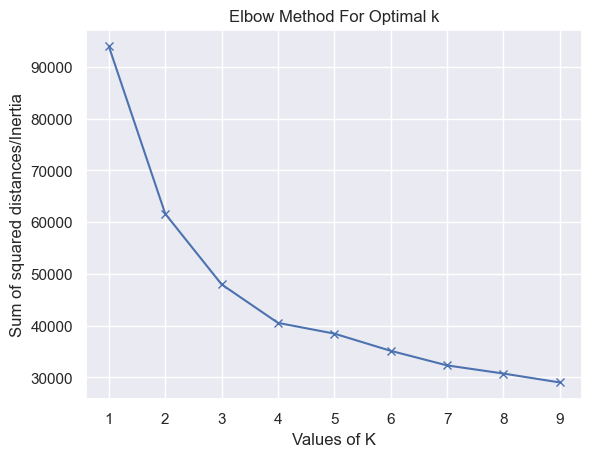

In [ ]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
now_df.sort_values(by='clusters',ascending=True)[now_df.clusters == 3 ].head(10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25232\4177693389.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  now_df.sort_values(by='clusters',ascending=True)[now_df.clusters == 3 ].head(10)


gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
193       1  55.68      1  61.33      1      1     56.87         0       0   
87        1  52.00      0  57.00      0      1     50.80         0       0   
96        0  45.00      1  57.00      1      1     58.00         0       1   
16        0  55.00      0  67.00      0      1     64.00         0       0   
2         1  56.00      0  52.00      0      2     52.00         2       0   
13        1  62.00      0  47.00      0      1     50.00         0       0   
195       1  61.00      1  62.00      1      1     65.00         0       0   
185       1  52.00      1  55.00      1      1     56.30         0       0   
102       1  61.08      1  50.00      1      2     54.00         2       0   
11        0  47.00      0  55.00      1      2     65.00         0       0   

     etest_p  specialisation  mba_p  clusters  
193    66.00               1  58.30         3  
87     67.00               1  62.79         3  
96     56.39               1  64.95         3  
16     60.00               0  67.28         3  
2      66.00               1  59.43         3  
13     76.00               1  54.96         3  
195    62.00               0  56.81         3  
185    59.00               0  64.74         3  
102    71.00               0  65.69         3  
11     62.00               1  65.04         3

In [ ]:
now_df.sort_values(by='clusters',ascending=True)[now_df.clusters == 0 ].head(10)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25232\319201648.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  now_df.sort_values(by='clusters',ascending=True)[now_df.clusters == 0 ].head(10)


gender  ssc_p  ssc_b  hsc_p  hsc_b  hsc_s  degree_p  degree_t  workex  \
98        0   77.0      1  61.00      1      1     68.00         0       1   
141       0   77.0      0  86.00      0      0     56.00         1       0   
52        1   63.0      1  71.40      1      1     61.40         0       0   
143       1   71.0      0  58.66      0      2     58.00         2       1   
80        1   70.0      0  63.00      1      2     70.00         2       1   
117       1   74.0      1  59.00      1      1     73.00         0       1   
100       1   69.0      0  63.00      1      2     65.00         0       1   
118       1   67.0      0  71.00      0      2     64.33         1       1   
151       1   67.0      1  63.00      1      2     64.00         2       0   
45        1   63.0      1  62.00      1      1     68.00         0       0   

     etest_p  specialisation  mba_p  clusters  
98      57.5               0  61.31         0  
141     57.0               0  64.08         0  
52      68.0               0  66.88         0  
143     56.0               0  61.30         0  
80      55.0               0  62.00         0  
117     60.0               1  56.70         0  
100     55.0               1  58.23         0  
118     64.0               1  61.26         0  
151     60.0               0  61.87         0  
45      64.0               0  62.46         0